# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
from wordcloud import WordCloud
from dotenv import load_dotenv

# Data Gathering

In [2]:
df1 = pd.read_csv('../../../data/evaluation_result_combination_1.csv')
df2 = pd.read_csv('../../../data/evaluation_result_combination_2.csv')
df3 = pd.read_csv('../../../data/evaluation_result_combination_3.csv')
df4 = pd.read_csv('../../../data/evaluation_result_combination_4.csv')
df5 = pd.read_csv('../../../data/evaluation_result_combination_5.csv')
df6 = pd.read_csv('../../../data/evaluation_result_combination_6.csv')
df7 = pd.read_csv('../../../data/evaluation_result_combination_7.csv')
df8 = pd.read_csv('../../../data/evaluation_result_combination_8.csv')

evaluation_results = {
    'combination_1': df1,
    'combination_2': df2,
    'combination_3': df3,
    'combination_4': df4,
    'combination_5': df5,
    'combination_6': df6,
    'combination_7': df7,
    'combination_8': df8
}

In [3]:
load_dotenv()

with open('../../../config/eval_configs.json') as f:
    configs = json.load(f)

configs

[{'name': 'combination_1',
  'collection': 'cvd_collection_v1',
  'embedding_model': 'nomic-embed-text',
  'llm_model': 'llama3.1',
  'hyde': False,
  'answer_finished': True,
  'eval_finished': True},
 {'name': 'combination_2',
  'collection': 'cvd_collection_v1',
  'embedding_model': 'nomic-embed-text',
  'llm_model': 'deepseek-v2',
  'hyde': False,
  'answer_finished': True,
  'eval_finished': True},
 {'name': 'combination_3',
  'collection': 'cvd_collection_v2',
  'embedding_model': 'mxbai-embed-large',
  'llm_model': 'llama3.1',
  'hyde': False,
  'answer_finished': True,
  'eval_finished': True},
 {'name': 'combination_4',
  'collection': 'cvd_collection_v2',
  'embedding_model': 'mxbai-embed-large',
  'llm_model': 'deepseek-v2',
  'hyde': False,
  'answer_finished': True,
  'eval_finished': True},
 {'name': 'combination_5',
  'collection': 'cvd_collection_v1',
  'embedding_model': 'nomic-embed-text',
  'llm_model': 'llama3.1',
  'hyde': True,
  'answer_finished': True,
  'eval_f

In [4]:
df_duration = pd.read_csv('../../../data/answer_duration.csv')

df_duration

,config,collection,embedding_model,llm_model,hyde,duration
0,combination_1,cvd_collection_v1,nomic-embed-text,llama3.1,False,815.000000
1,combination_2,cvd_collection_v1,nomic-embed-text,deepseek-v2,False,827.994615
2,combination_3,cvd_collection_v2,mxbai-embed-large,llama3.1,False,1569.609240
3,combination_4,cvd_collection_v2,mxbai-embed-large,deepseek-v2,False,965.847598
4,combination_5,cvd_collection_v1,nomic-embed-text,llama3.1,True,1371.966792
5,combination_6,cvd_collection_v1,nomic-embed-text,deepseek-v2,True,1313.634411
6,combination_7,cvd_collection_v2,mxbai-embed-large,llama3.1,True,1947.202621
7,combination_8,cvd_collection_v2,mxbai-embed-large,deepseek-v2,True,5828.543794


# Combination Comparison

In [64]:
metrics = ['faithfulness', 'answer_relevancy', 'context_precision', 'context_recall']

In [65]:
eval_results_mean = {
    'name': [],
    'embedding_model': [],
    'llm_model': [],
    'hyde': [],
    'faithfulness': [],
    'answer_relevancy': [],
    'context_precision': [],
    'context_recall': []
}

for config in configs:
    eval_results_mean['name'].append(config['name'])
    eval_results_mean['embedding_model'].append(config['embedding_model'])
    eval_results_mean['llm_model'].append(config['llm_model'])
    eval_results_mean['hyde'].append(config['hyde'])

    df = evaluation_results[config['name']]

    for metric in metrics:
        eval_results_mean[metric].append(df[metric].mean())
    
eval_results_df = pd.DataFrame(eval_results_mean)

eval_results_df

,name,embedding_model,llm_model,hyde,faithfulness,answer_relevancy,context_precision,context_recall
0,combination_1,nomic-embed-text,llama3.1,False,0.865434,0.603862,0.927500,0.865026
1,combination_2,nomic-embed-text,deepseek-v2,False,0.679979,0.607516,0.935833,0.871289
2,combination_3,mxbai-embed-large,llama3.1,False,0.895291,0.607047,0.946667,0.909773
3,combination_4,mxbai-embed-large,deepseek-v2,False,0.679313,0.612513,0.946667,0.912523
4,combination_5,nomic-embed-text,llama3.1,True,0.883276,0.608297,0.930000,0.894634
5,combination_6,nomic-embed-text,deepseek-v2,True,0.698306,0.610174,0.934343,0.922512
6,combination_7,mxbai-embed-large,llama3.1,True,0.935251,0.624166,0.950000,0.949726
7,combination_8,mxbai-embed-large,deepseek-v2,True,0.702963,0.608014,0.963333,0.972524


In [90]:
def plot_metric_comparison(df, metric, col):
    # Plot with the values from the dataframe
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df, x=col, y=metric)
    
    # Annotate the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)
    
    plt.ylim(0, 1)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=45)
    plt.xlabel('Combination')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()
    plt.show()

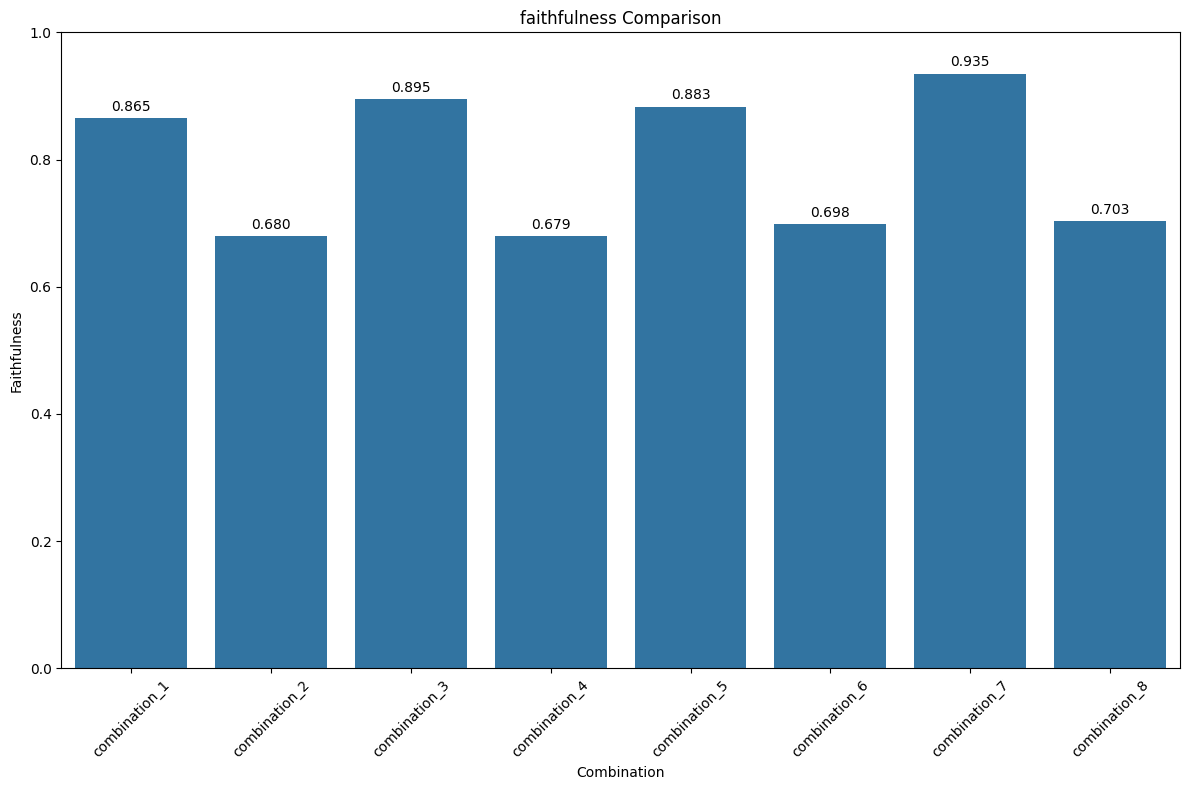

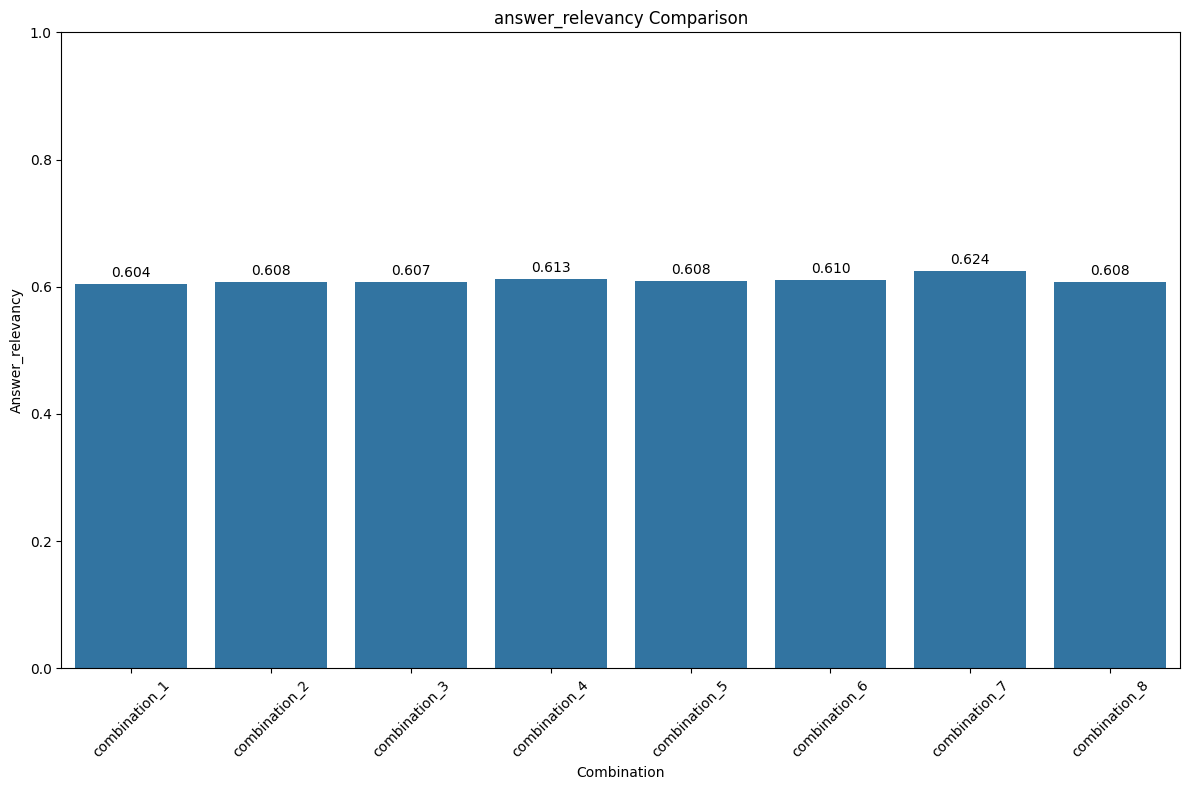

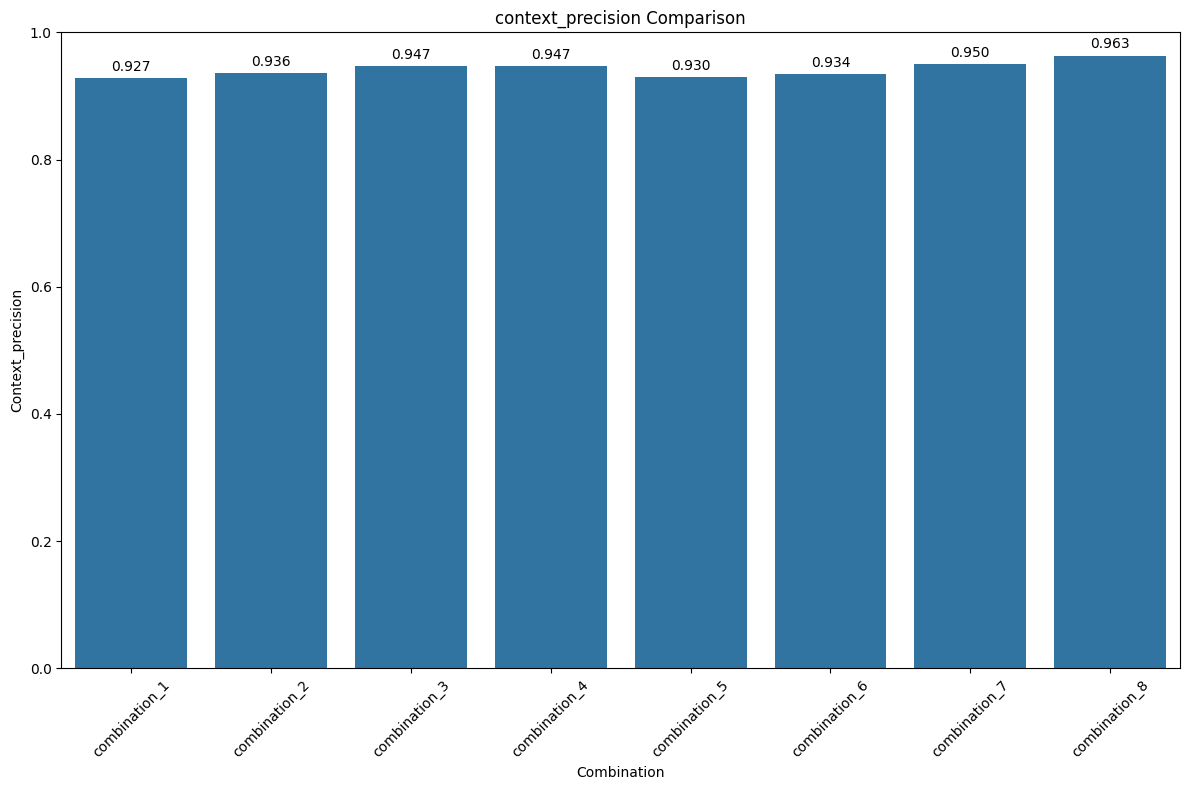

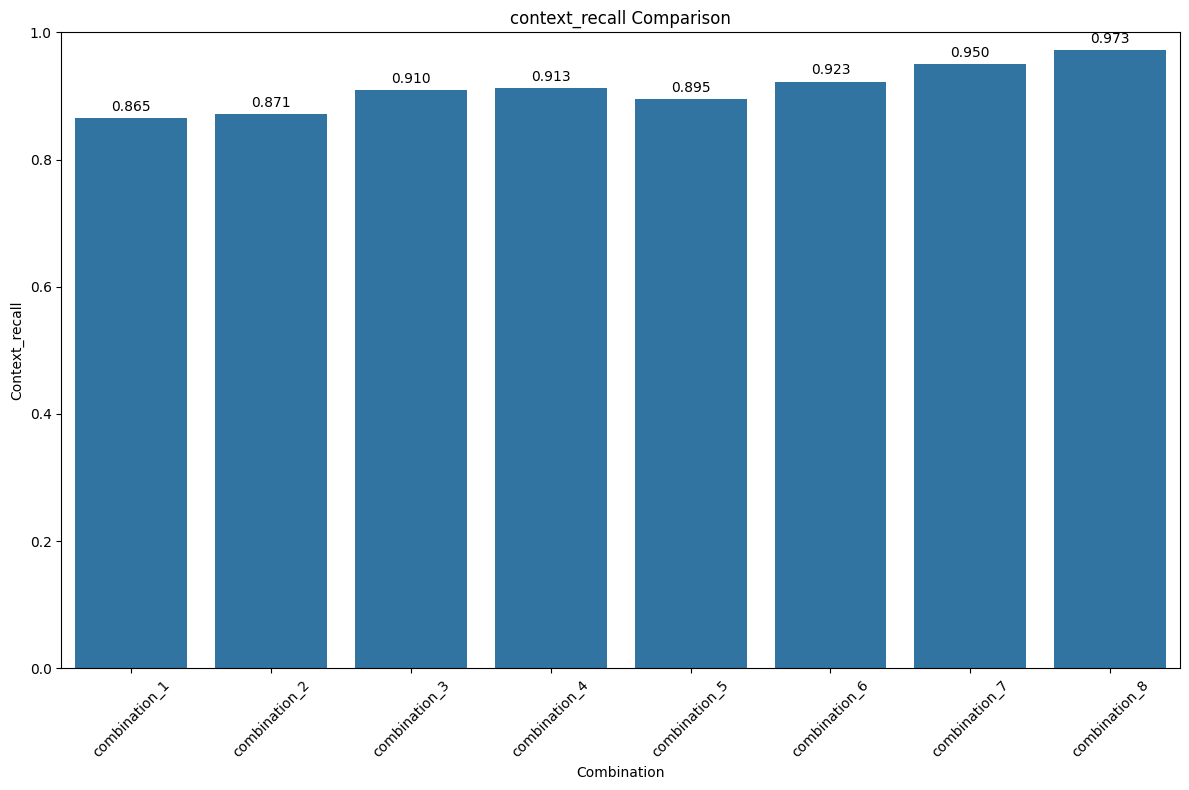

In [91]:
for metric in metrics:
    plot_metric_comparison(eval_results_df, metric, 'name')

In [67]:
groupby_list = ['embedding_model', 'llm_model', 'hyde']

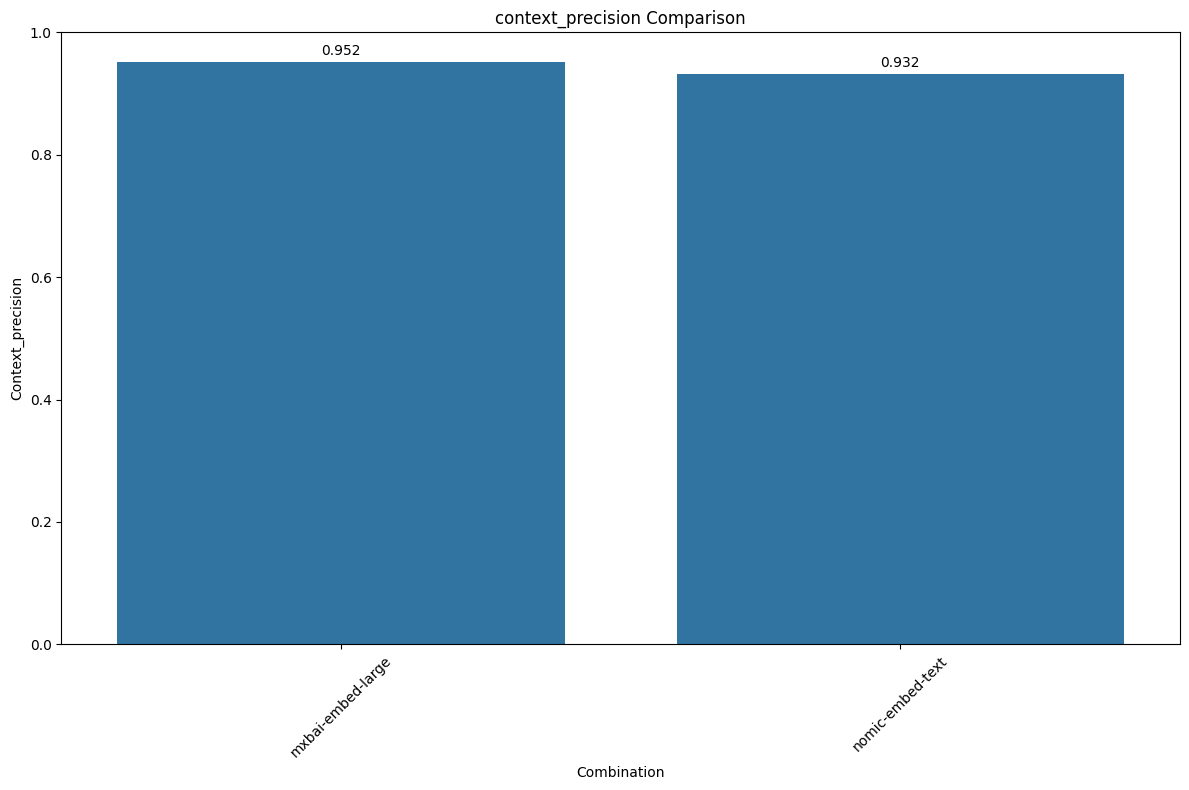

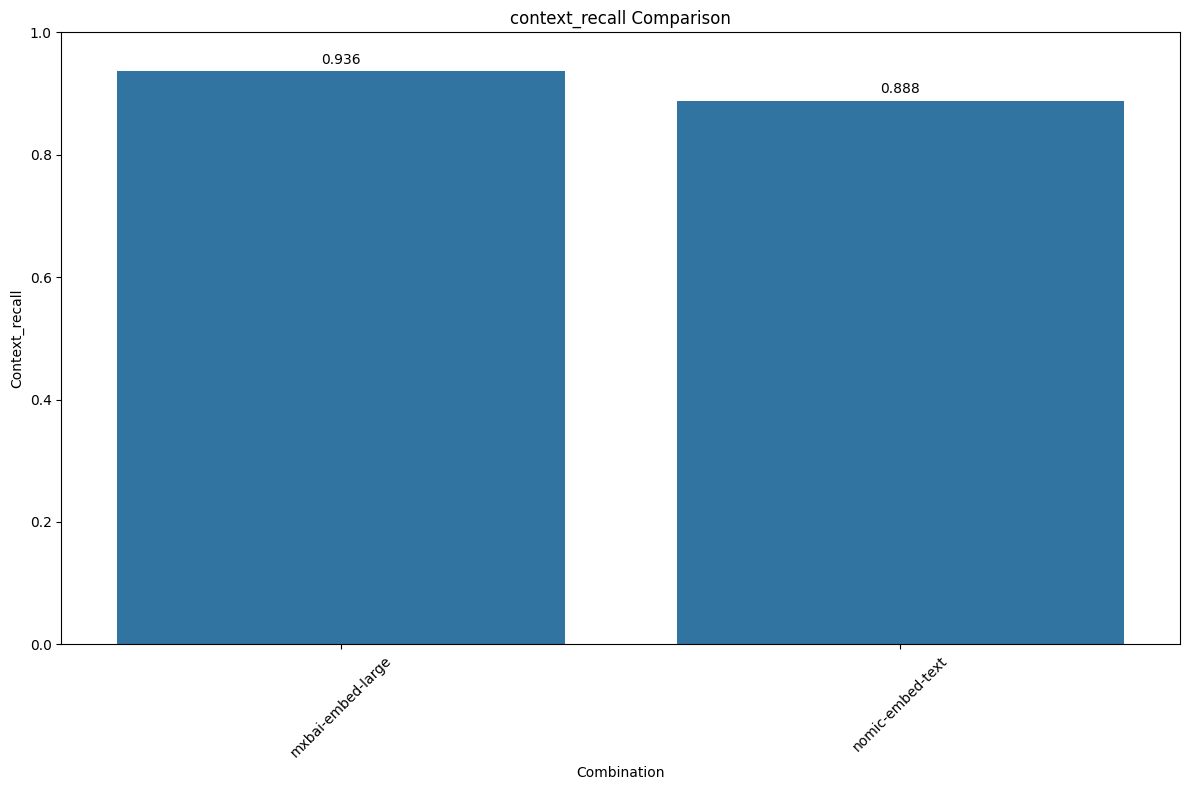

In [71]:
comparison_df = eval_results_df.groupby('embedding_model').mean(numeric_only=True).reset_index()
comparison_df = comparison_df.drop(columns=['hyde'])

retriever_metrics = metrics[2:]

for metric in retriever_metrics:
    plot_metric_comparison(comparison_df, metric, 'embedding_model')

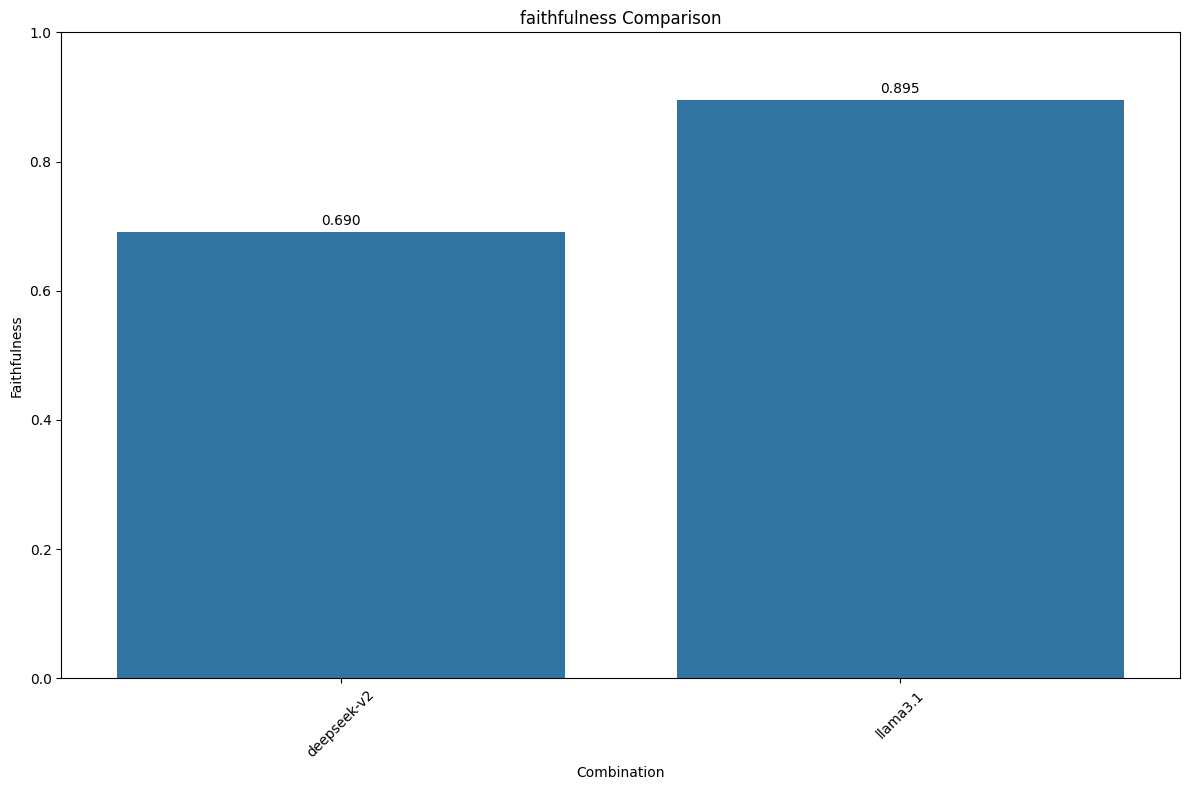

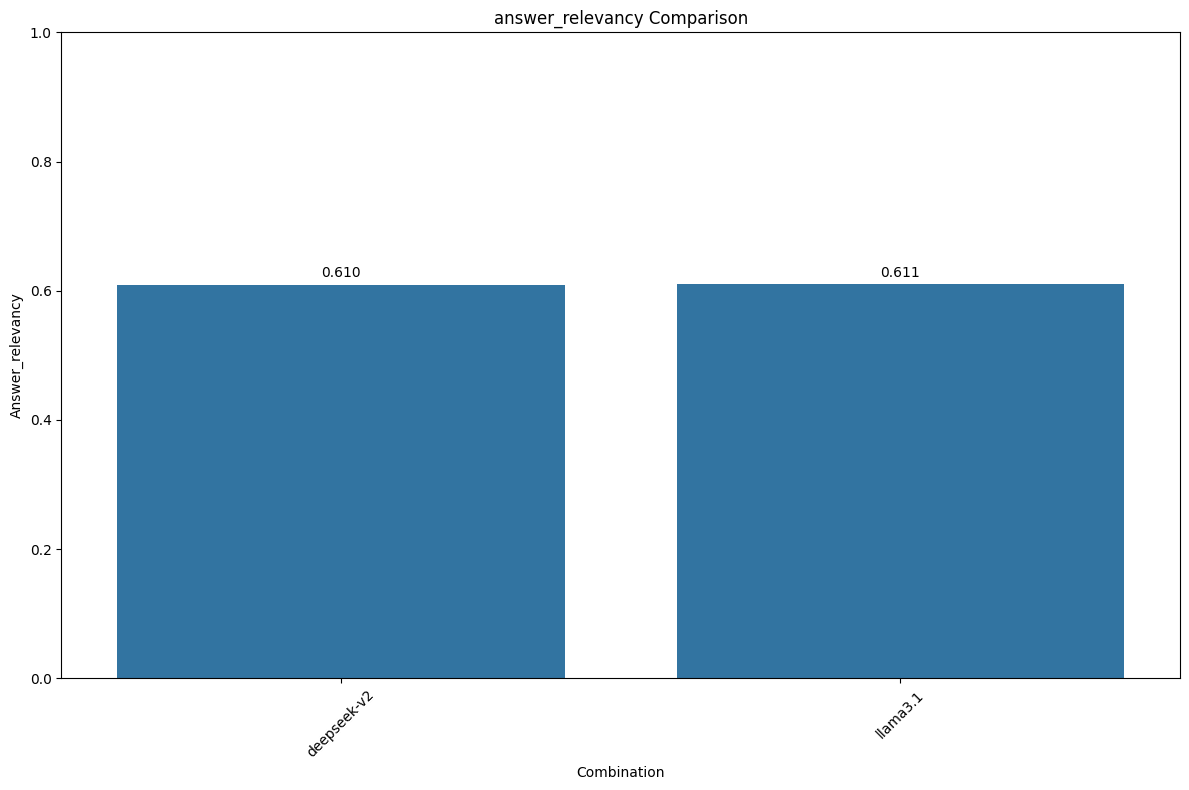

In [73]:
comparison_df = eval_results_df.groupby('llm_model').mean(numeric_only=True).reset_index()
comparison_df = comparison_df.drop(columns=['hyde'])

retriever_metrics = metrics[:2]

for metric in retriever_metrics:
    plot_metric_comparison(comparison_df, metric, 'llm_model')

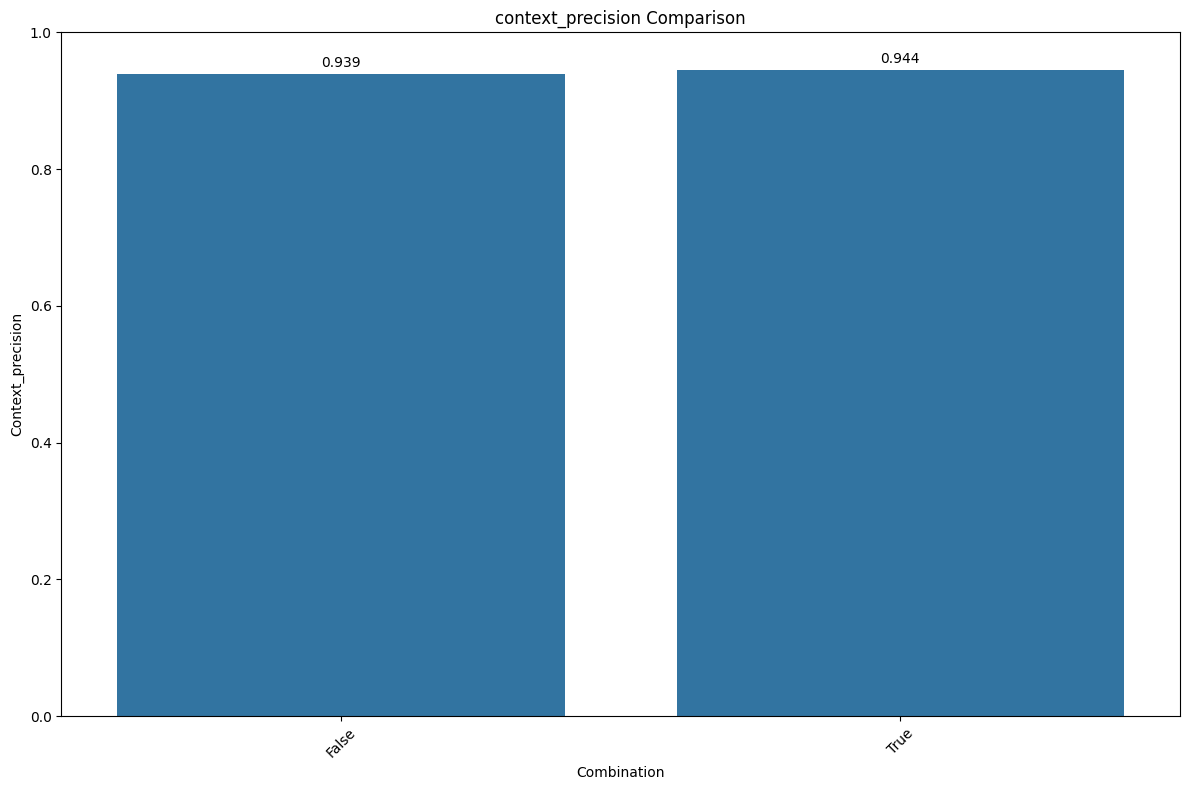

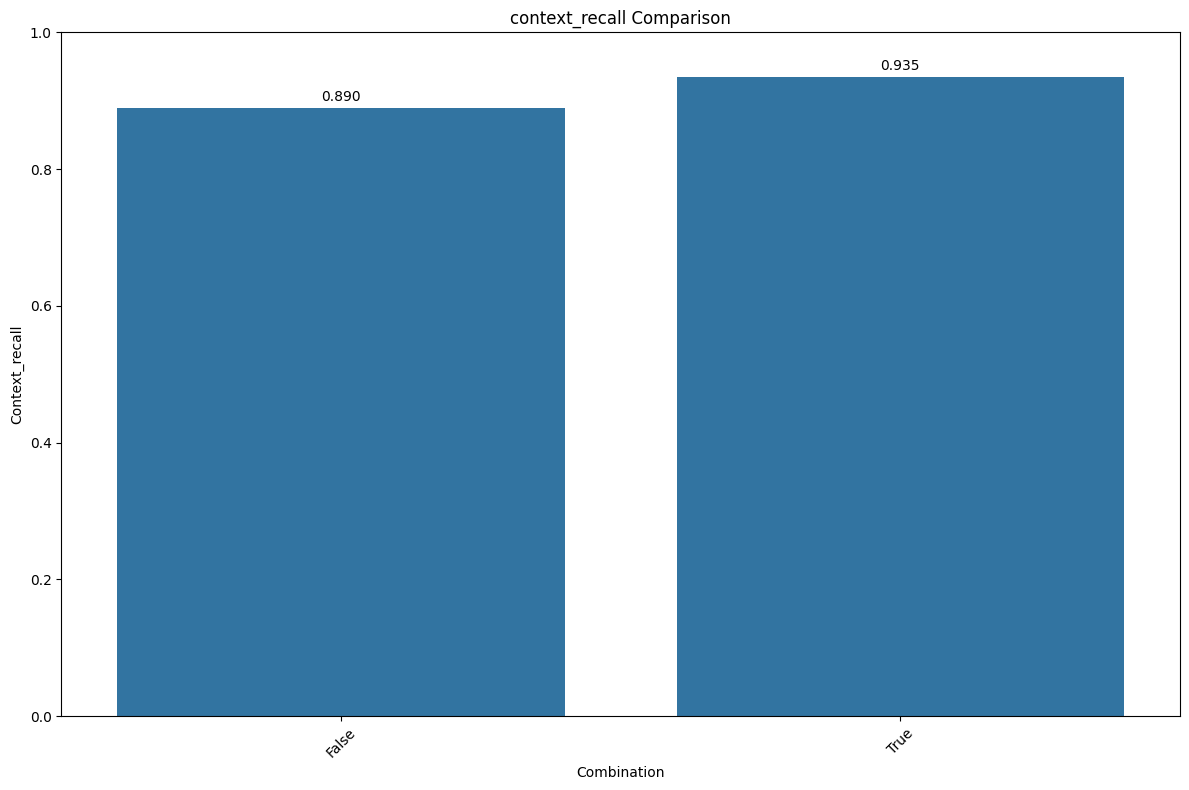

In [77]:
comparison_df = eval_results_df.groupby('hyde').mean(numeric_only=True).reset_index()

retriever_metrics = metrics[2:]

for metric in retriever_metrics:
    plot_metric_comparison(comparison_df, metric, 'hyde')

In [ ]:
for item in evaluation_results.keys():
    print(f"{item} Evaluation Result")
    print(evaluation_results[item].describe())
    print('\n')

combination_1 Evaluation Result
       faithfulness  answer_relevancy  context_precision  context_recall
count    100.000000        100.000000          100.00000      100.000000
mean       0.865434          0.603862            0.92750        0.865026
std        0.231550          0.180722            0.16903        0.297097
min        0.000000          0.000000            0.00000        0.000000
25%        0.800000          0.542605            1.00000        1.000000
50%        1.000000          0.614769            1.00000        1.000000
75%        1.000000          0.686766            1.00000        1.000000
max        1.000000          0.965549            1.00000        1.000000


combination_2 Evaluation Result
       faithfulness  answer_relevancy  context_precision  context_recall
count    100.000000        100.000000         100.000000      100.000000
mean       0.679979          0.607516           0.935833        0.871289
std        0.279072          0.178829           0.163203  

# Duration Comparison

In [79]:
df_duration.describe()

,duration
count,8.000000
mean,1829.974884
std,1661.639435
min,815.000000
25%,931.384352
50%,1342.800601
75%,1664.007585
max,5828.543794


In [87]:
def plot_duration_comparison(df, col):
    # Plot with the values from the dataframe
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df, x=col, y='duration')
    
    # Annotate the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3)

    plt.title(f'Duration Comparison')
    plt.xticks(rotation=45)
    plt.xlabel('Combination')
    plt.ylabel('Duration')
    plt.tight_layout()
    plt.show()

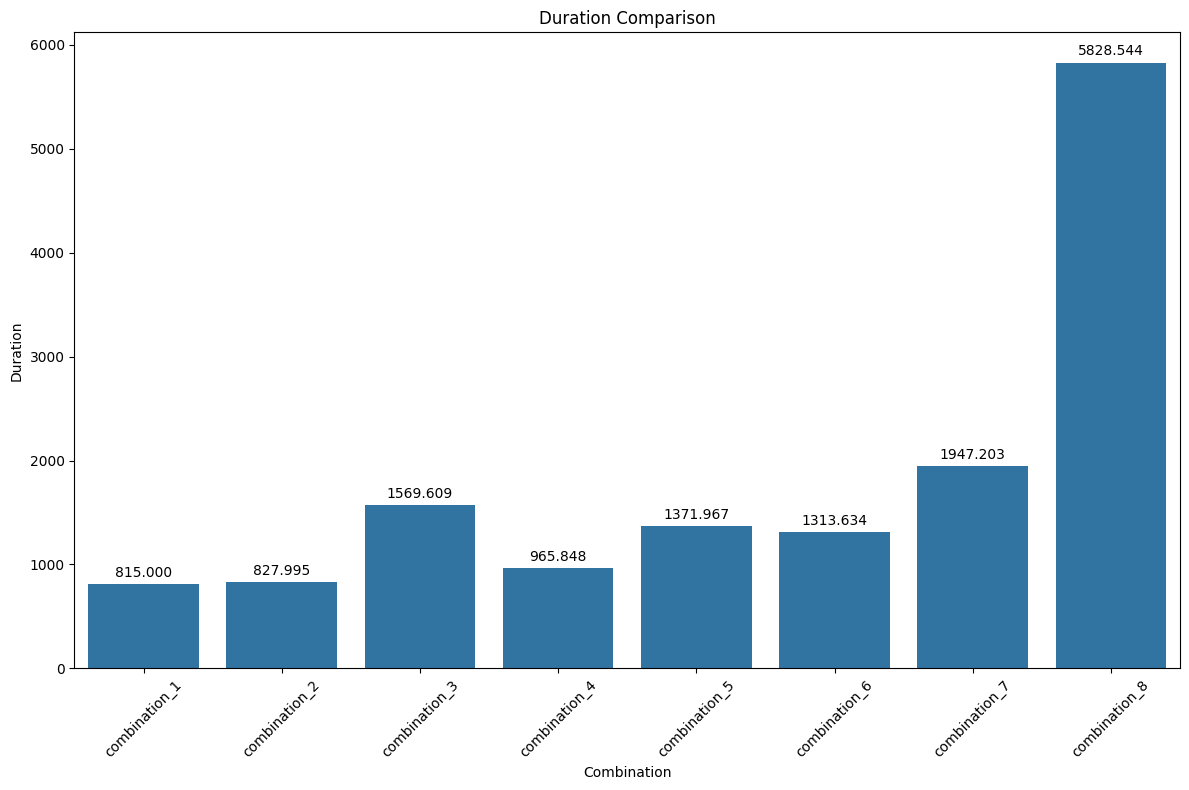

In [97]:
plot_duration_comparison(df_duration, 'config')

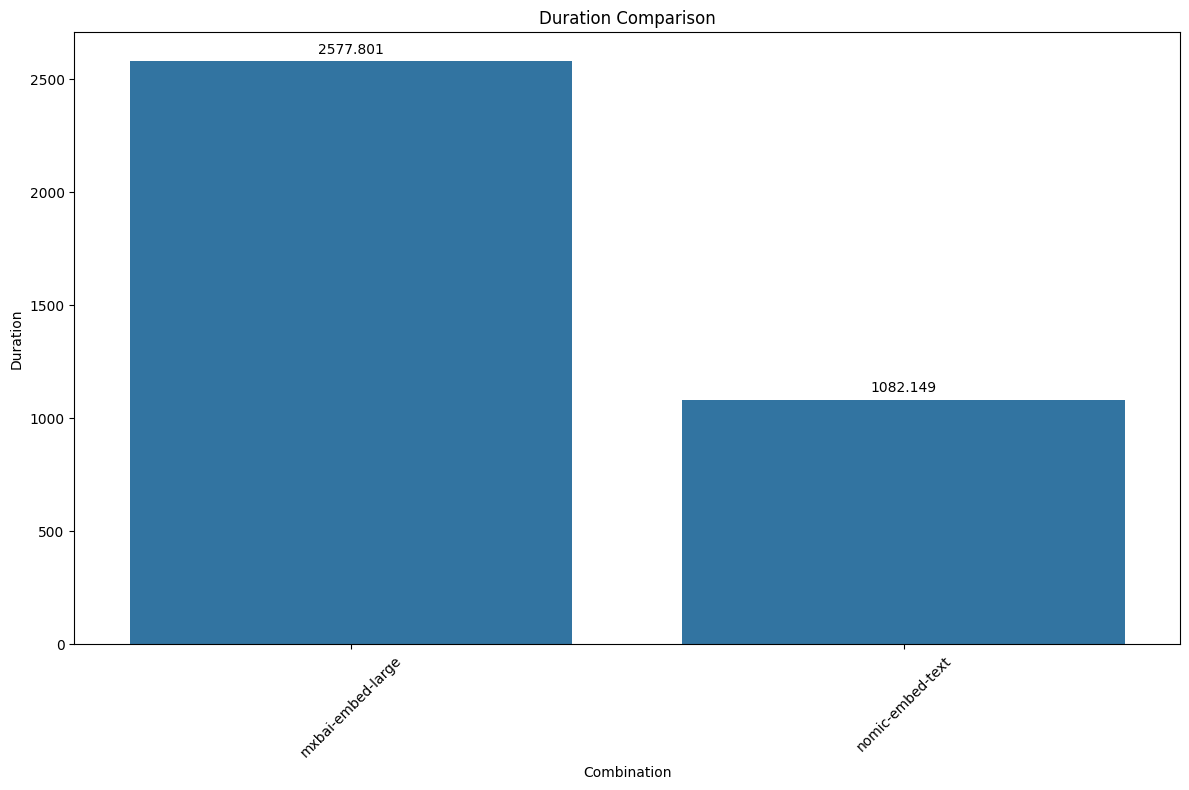

In [88]:
comparison_df = df_duration.groupby('embedding_model').mean(numeric_only=True).reset_index()

plot_duration_comparison(comparison_df, 'embedding_model')

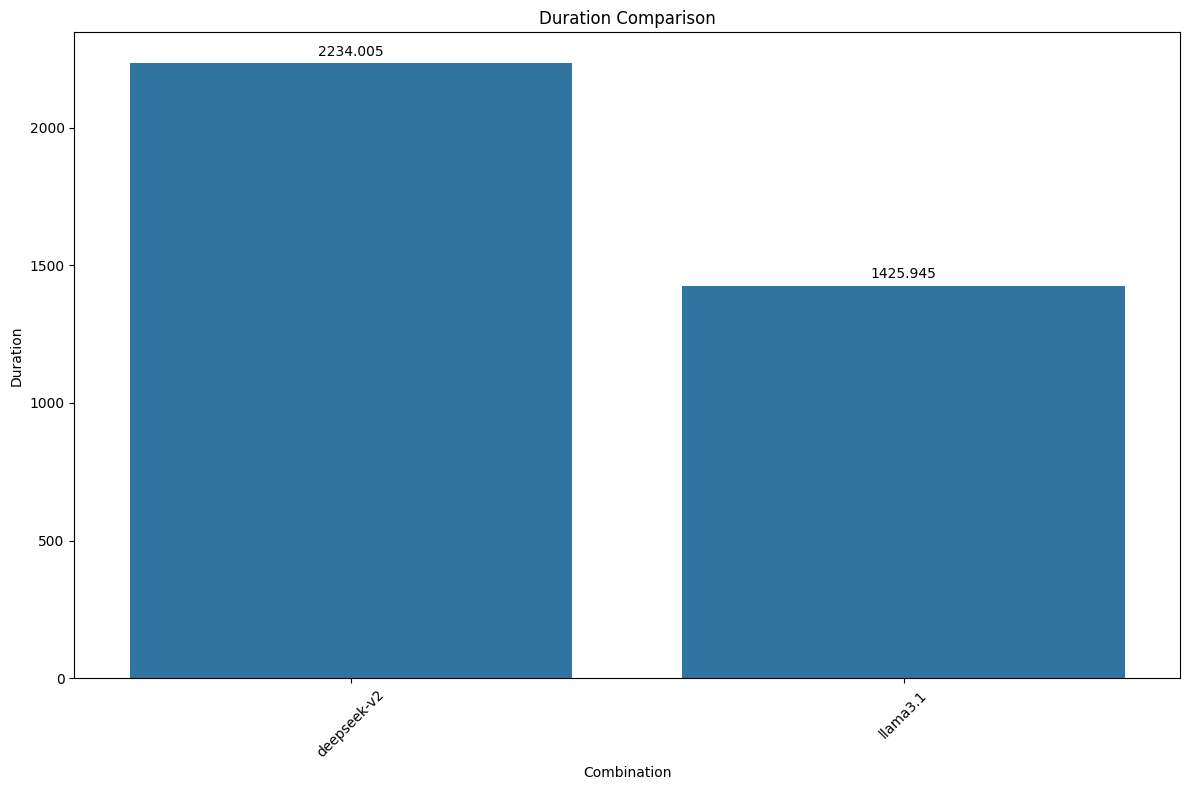

In [98]:
comparison_df = df_duration.groupby('llm_model').mean(numeric_only=True).reset_index()

plot_duration_comparison(comparison_df, 'llm_model')

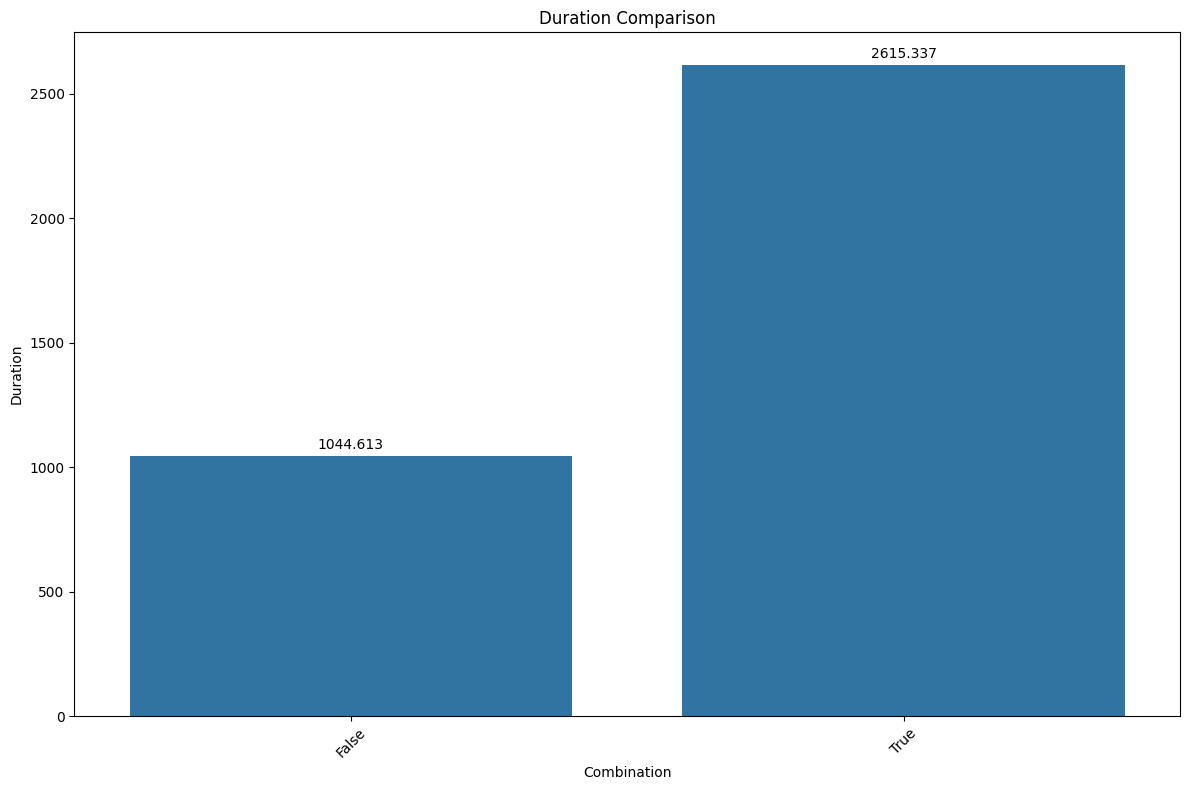

In [99]:
comparison_df = df_duration.groupby('hyde').mean(numeric_only=True).reset_index()

plot_duration_comparison(comparison_df, 'hyde')

# Error Analysis

In [5]:
low_faithfulness = {
    'question': [],
    'ground_truth': [],
    'retrieved_contexts': [],
    'answer': [],
    'hypothesis': [],
    'config': [],
    'embedding_model': [],
    'llm_model': [],
    'hyde': [],
    'faithfulness': []
}

low_answer_relevancy = {
    'question': [],
    'ground_truth': [],
    'retrieved_contexts': [],
    'answer': [],
    'hypothesis': [],
    'config': [],
    'embedding_model': [],
    'llm_model': [],
    'hyde': [],
    'answer_relevancy': []
}

low_context_precision = {
    'question': [],
    'ground_truth': [],
    'retrieved_contexts': [],
    'answer': [],
    'hypothesis': [],
    'config': [],
    'embedding_model': [],
    'llm_model': [],
    'hyde': [],
    'context_precision': []
}

low_context_recall = {
    'question': [],
    'ground_truth': [],
    'retrieved_contexts': [],
    'answer': [],
    'hypothesis': [],
    'config': [],
    'embedding_model': [],
    'llm_model': [],
    'hyde': [],
    'context_recall': []
}

for config in configs:
    df = evaluation_results[config['name']]
    df_faith = df.sort_values(by='faithfulness', ascending=True)
    df_faith = df_faith.head(2)

    df_relevance = df.sort_values(by='answer_relevancy', ascending=True)
    df_relevance = df_relevance.head(2)

    df_context_p = df.sort_values(by='context_precision', ascending=True)
    df_context_p = df_context_p.head(2)

    df_context_r = df.sort_values(by='context_recall', ascending=True)
    df_context_r = df_context_r.head(2)

    for i in range(len(df_faith)):
        low_faithfulness['question'].append(df_faith['question'].iloc[i])
        low_faithfulness['ground_truth'].append(df_faith['ground_truth'].iloc[i])
        low_faithfulness['retrieved_contexts'].append(df_faith['retrieved_contexts'].iloc[i])
        low_faithfulness['answer'].append(df_faith['answer'].iloc[i])
        if config['hyde']:
            low_faithfulness['hypothesis'].append(df_faith['hypothesis'].iloc[i])
        else:
            low_faithfulness['hypothesis'].append('None')
        low_faithfulness['config'].append(config['name'])
        low_faithfulness['embedding_model'].append(config['embedding_model'])
        low_faithfulness['llm_model'].append(config['llm_model'])
        low_faithfulness['hyde'].append(config['hyde'])
        low_faithfulness['faithfulness'].append(df_faith['faithfulness'].iloc[i])

        low_answer_relevancy['question'].append(df_relevance['question'].iloc[i])
        low_answer_relevancy['ground_truth'].append(df_relevance['ground_truth'].iloc[i])
        low_answer_relevancy['retrieved_contexts'].append(df_relevance['retrieved_contexts'].iloc[i])
        low_answer_relevancy['answer'].append(df_relevance['answer'].iloc[i])
        if config['hyde']:
            low_answer_relevancy['hypothesis'].append(df_relevance['hypothesis'].iloc[i])
        else:
            low_answer_relevancy['hypothesis'].append('None')
        low_answer_relevancy['config'].append(config['name'])
        low_answer_relevancy['embedding_model'].append(config['embedding_model'])
        low_answer_relevancy['llm_model'].append(config['llm_model'])
        low_answer_relevancy['hyde'].append(config['hyde'])
        low_answer_relevancy['answer_relevancy'].append(df_relevance['answer_relevancy'].iloc[i])

        low_context_precision['question'].append(df_context_p['question'].iloc[i])
        low_context_precision['ground_truth'].append(df_context_p['ground_truth'].iloc[i])
        low_context_precision['retrieved_contexts'].append(df_context_p['retrieved_contexts'].iloc[i])
        low_context_precision['answer'].append(df_context_p['answer'].iloc[i])
        if config['hyde']:
            low_context_precision['hypothesis'].append(df_context_p['hypothesis'].iloc[i])
        else:
            low_context_precision['hypothesis'].append('None')
        low_context_precision['config'].append(config['name'])
        low_context_precision['embedding_model'].append(config['embedding_model'])
        low_context_precision['llm_model'].append(config['llm_model'])
        low_context_precision['hyde'].append(config['hyde'])
        low_context_precision['context_precision'].append(df_context_p['context_precision'].iloc[i])

        low_context_recall['question'].append(df_context_r['question'].iloc[i])
        low_context_recall['ground_truth'].append(df_context_r['ground_truth'].iloc[i])
        low_context_recall['retrieved_contexts'].append(df_context_r['retrieved_contexts'].iloc[i])
        low_context_recall['answer'].append(df_context_r['answer'].iloc[i])
        if config['hyde']:
            low_context_recall['hypothesis'].append(df_context_r['hypothesis'].iloc[i])
        else:
            low_context_recall['hypothesis'].append('None')
        low_context_recall['config'].append(config['name'])
        low_context_recall['embedding_model'].append(config['embedding_model'])
        low_context_recall['llm_model'].append(config['llm_model'])
        low_context_recall['hyde'].append(config['hyde'])
        low_context_recall['context_recall'].append(df_context_r['context_recall'].iloc[i])

# Convert to DataFrame
low_faithfulness_df = pd.DataFrame(low_faithfulness)
low_answer_relevancy_df = pd.DataFrame(low_answer_relevancy)
low_context_precision_df = pd.DataFrame(low_context_precision)
low_context_recall_df = pd.DataFrame(low_context_recall)

low_faithfulness_df.to_csv('../../../data/low_faithfulness.csv', index=False)
low_answer_relevancy_df.to_csv('../../../data/low_answer_relevancy.csv', index=False)
low_context_precision_df.to_csv('../../../data/low_context_precision.csv', index=False)
low_context_recall_df.to_csv('../../../data/low_context_recall.csv', index=False)

In [32]:
df = evaluation_results['combination_2']
df_faith = df.sort_values(by='context_precision', ascending=True)
row = df_faith.iloc[2]

# Export to JSON
with open('../../../data/new_row_combination_2.json', 'w') as f:
    json.dump(row.to_dict(), f, indent=4)

In [40]:
df = evaluation_results['combination_3']
df_faith = df.sort_values(by='context_precision', ascending=True)
row = df_faith.iloc[4]

# Export to JSON
with open('../../../data/new_row_combination_3.json', 'w') as f:
    json.dump(row.to_dict(), f, indent=4)

In [44]:
df = evaluation_results['combination_4']
df_faith = df.sort_values(by='context_precision', ascending=True)
row = df_faith.iloc[4]

# Export to JSON
with open('../../../data/new_row_combination_4.json', 'w') as f:
    json.dump(row.to_dict(), f, indent=4)

In [46]:
df = evaluation_results['combination_7']
df_faith = df.sort_values(by='context_precision', ascending=True)
row = df_faith.iloc[2]

# Export to JSON
with open('../../../data/new_row_combination_7.json', 'w') as f:
    json.dump(row.to_dict(), f, indent=4)

In [50]:
df = evaluation_results['combination_8']
df_faith = df.sort_values(by='context_precision', ascending=True)
row = df_faith.iloc[2]

# Export to JSON
with open('../../../data/new_row_combination_8.json', 'w') as f:
    json.dump(row.to_dict(), f, indent=4)